# Exercise 3.2 - Daily distance


## Introduction 
In this exercise you are going to analyze the daily distance, i.e., distance covered by a vehicle in one day, of our vehicle. The daily distance of a vehicle is an established characteristic value due to its simplicity and availability. It gathers various information such as the level and regularity of utilization and therefore allows first conclusions with regard to the vehicle’s movement patterns.

## Preparation
First of all we need to import all necessary packages and modules:
* pandas (pandas dataframes)
* numpy (numpy arrays as well as various mathematical methods)
* matplotlib.pyplot (plotting)
* register_matplotlib_converters (datetime converter for a matplotlib plotting method)

Notice:<br/> 
In order to use datetime objects in plots a datetime converter is necessary. Currently the datetime converter is registered implicitly by pandas on import. However, Future versions of pandas will require you to explicitly register matplotlib converters. This is why we import and register the datetime converter manually.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters

Further, we want to set the font size of all plots globally and we need to register the datetime converter. 

In [2]:
# set font size of all plots globally
plt.rcParams.update({'font.size': 16})

# register datetime converter for a matplotlib plotting method
register_matplotlib_converters()

## Data import

In [3]:
data_df = pd.read_pickle('data/e32_data_df.pkl')

## Available data
The data that is available for the following exercises is a pandas dataframe called data_df with the following rows:
* days: day as datetime64
* daily_distance: distance in m covered by the vehicle in one day

In [4]:
display(data_df)

,day,daily_distance
0,2018-01-10,31485.0
1,2018-01-11,91517.0
2,2018-01-12,231453.0
3,2018-01-14,150328.0
4,2018-01-15,103341.0
5,2018-01-16,57522.0
6,2018-01-17,96233.0
7,2018-01-18,106016.0
8,2018-01-19,84496.0
9,2018-01-20,60839.0


## Exercise 3.2.1 Calculate statistical measures

### Task
First of all, we are going to calculate some statistical measures for later usage. The Five-Number Summary is a proven method to describe a numerical data set statistically. 
1. Calculate all statistical measures according to the Five-number summary.
2. Ensure that all quantaties are scaled to km in order to increase readability. 

##### Signature of the script
The signature of the script definies the interfaces (INPUT, OUTPUT) of the current task within this notebook. It is up to you, how you get from INPUT to OUTPUT.
* INPUT: Pandas dataframe data_df
* OUPUT: Scalar values minimum, lower_quartile, median, upper_quartile and maximum

###### Reminder
The Five-Number-Summary is a common set of statistical measures. It consists of the following five statistical measures:
* The minimum value of a data set
* The lower quartile of a data set
* The median of a data set 
* The upper quartile of a data set
* the maximum value of a data set 

##### Hint
Use numpy (https://docs.scipy.org/doc/numpy-1.14.0/reference/routines.statistics.html) to calculate the Five-Number-Summary. 

##### Solution
minimum = 4.194<br/>
lower_quartile = 29.7685<br/>
median = 84.403<br/>
upper_quartile = 126.7895<br/>
maximum = 353.66

### Your code goes here:

In [18]:
print("minimum: %s km" %(np.min(data_df.daily_distance)/1000))
print("lower_quartile: %s km" %(np.percentile(data_df.daily_distance, 25)/1000))
print("median: %s km" %(np.median(data_df.daily_distance)/1000))
print("upper_quartile: %s km" %(np.percentile(data_df.daily_distance, 75)/1000))
print("maximum: %s km" %(np.max(data_df.daily_distance)/1000))

minimum: 4.194 km
lower_quartile: 29.7685 km
median: 84.403 km
upper_quartile: 126.7895 km
maximum: 353.661 km


## Exercise 3.2.2 Plot daily distances over days

### Task
In this task we want to plot the daily distances over the days. Our aim is to gain a first impression of our vehicle's movement patterns. We are going to use a bar chart for this purpose. In addition, we want to visualize the Five-Number Summary using horizontal lines within the same plot. 
1. Create a plot as depicted below.

##### Signature of the script
The signature of the script definies the interfaces (INPUT, OUTPUT) of the current task within this notebook. It is up to you, how you get from INPUT to OUTPUT.
* INPUT: Pandas dataframe data_df, scalar values minimum, lower_quartile, median, upper_quartile and maximum
* OUPUT: Plot as depicted below

###### Reminder
-

##### Hint
-

##### Solution
![title](data/img/solution_e412.png)

### Your code goes here:

In [68]:
minimum = np.min(data_df.daily_distance)/1000
lower_quartile = np.percentile(data_df.daily_distance, 25)/1000
median = np.median(data_df.daily_distance)/1000
upper_quartile = np.percentile(data_df.daily_distance, 75)/1000
maximum = np.max(data_df.daily_distance)/1000

In [126]:
def plotDailyDistanceOverDays(data_df, minimum, lower_quartile, median, upper_quartile, maximum):    
    fig, ax = plt.subplots(figsize=(10, 7))
    
    ax.bar(data_df.day, data_df.daily_distance/1000, align='center', label='Daily distance')
    ax.set(xlabel='Day',
           ylabel='Daily distance in km',
           title='Daily distance over days')
    ax.grid(b=True, axis='y')
    
    
    plt.hlines(minimum, np.min(data_df.day), np.max(data_df.day), colors="g", linestyles = "-", label='minimum')
    plt.hlines(lower_quartile, np.min(data_df.day), np.max(data_df.day), colors="grey", linestyles = "--", label='lower_quartile')
    plt.hlines(median, np.min(data_df.day), np.max(data_df.day), colors="orange", linestyles = "-", label='median')
    plt.hlines(upper_quartile, np.min(data_df.day), np.max(data_df.day), colors="grey", linestyles = "-.", label='upper_quartile')
    plt.hlines(maximum, np.min(data_df.day), np.max(data_df.day), colors="r", linestyles = "-", label='maximum')
    
    ax.legend()
    plt.setp(ax.get_xticklabels(), rotation=70, horizontalalignment='center') 
    plt.show()
    

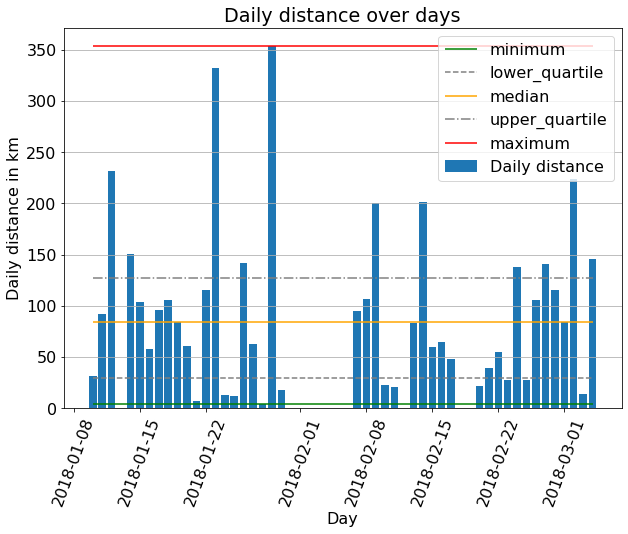

In [127]:
plotDailyDistanceOverDays(data_df, minimum, lower_quartile, median, upper_quartile, maximum)

## Exercise 3.2.3 Compare histogram and CDF

### Task
As you already know, a CDF has some clear advantages over the classic histogram. In order to compare both visualization techniques, we now want to plot both within one matplotlib figure. 
1. Create a plot as depicted below.
2. Can you confirm all claims of the articel "Why we love the CDF and do not like histograms that much?" published here: https://www.andata.at/en/software-blog-reader/why-we-love-the-cdf-and-do-not-like-histograms-that-much.html 

##### Signature of the script
The signature of the script definies the interfaces (INPUT, OUTPUT) of the current task within this notebook. It is up to you, how you get from INPUT to OUTPUT.
* INPUT: Pandas dataframe data_df
* OUPUT: Plot as depicted below

###### Reminder
-

##### Hint
* Use subplot function (https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.subplot.html) to place two plots within one figure
* In order to get the same plot styling as depicted below, you need to use following parameters: alpha=0.2, edgecolor='blue'
* Use the hist function (https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html) for both plots, i.e., histogram and CDF. Use following parameters to get the CDF: density=True and cumulative=True

##### Solution
![title](data/img/solution_e413.png)

### Your code goes here:

In [133]:
def plotHistogrammAndCDF(data_df):
    fig, ax = plt.subplots(2, 1, figsize=(10,10))

    ax[0].hist(data_df.daily_distance/1000, alpha=0.2, edgecolor='blue')
    ax[1].hist(data_df.daily_distance/1000, cumulative=True, alpha=0.2, edgecolor='blue', density=True)

    ax[0].set(ylabel='Number of days',
              title='Histogramm and CDF')
    ax[0].grid(b=True, axis='y')

    ax[1].set(xlabel='Daily distance in km',
              ylabel='Cumulative relative ferquency')
    ax[1].grid(b=True, axis='y')


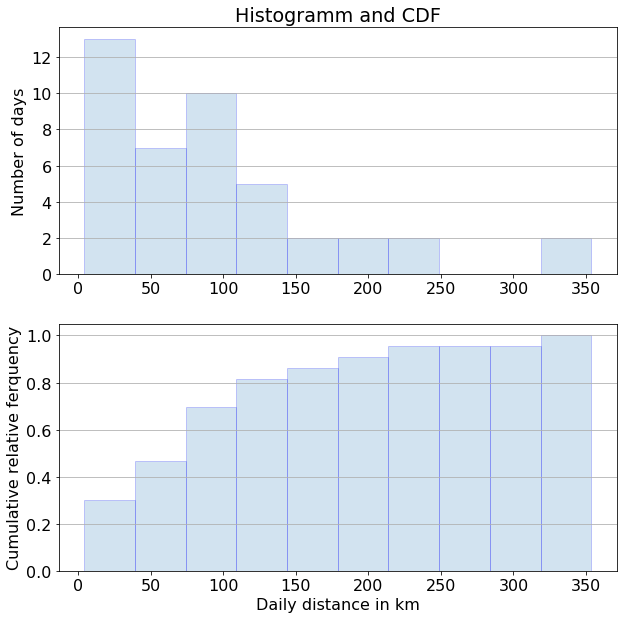

In [134]:
plotHistogrammAndCDF(data_df)

## Exercise 3.2.4 Plot CDF 

### Task
Obviously, the CDF has some advantages when comparing it to the histogram. However, the explanatory power of our CDF above is still limited due to the quite big bin size (= 10, see https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html) automatically used by matplotlib. To get a more familiar representation of the CDF, i.e., as a continous line, we need to calculate the CDF before plotting it as a simple line plot. 
1. Create a plot as depicted below.

###### Reminder
You can calculate the CDF using following code:<br/>
hist, bin_edges = np.histogram(data, bins=1000, density=True)<br/>
cdf = np.cumsum(hist)<br/>
cdf = cdf / cdf[-1]<br/>

And plot it as follows:<br/>
ax.plot(bin_edges[1:], cdf)

##### Hint


##### Solution
![title](data/img/solution_e414.png)

 ### Your code here:

In [201]:
def plotCDF(data_df, minimum, lower_quartile, median, upper_quartile, maximum):
    fig, ax = plt.subplots(figsize=(12,8))
    axes = plt.gca()
    
    hist, bin_edges = np.histogram(data_df.daily_distance/1000, bins=1000, density=True)
    cdf = np.cumsum(hist)
    cdf = cdf / cdf[-1]
    ax.plot(bin_edges[1:], cdf, label='CDF')
    
    ax.set(xlabel='Daily distance in km',
           ylabel='Cumulative relative frequency',
           title='Cumulative distribute function')
    ax.grid(b=True)
    
    axes.set_xlim([0, maximum+20])
    axes.set_ylim([0, 1.1])
    
    plt.vlines(minimum, 0, minimum/maximum, colors="g", linestyles = "-", label='minimum')
    plt.hlines(minimum/maximum, 0, minimum, colors="g", linestyles = "-")
    
    plt.vlines(lower_quartile, 0, lower_quartile/maximum, colors="grey", linestyles = "--", label='lower_quartile')
    plt.hlines(lower_quartile/maximum, 0, lower_quartile, colors="grey", linestyles = "--")
    
    plt.vlines(median, 0, median/maximum, colors="orange", linestyles = "-", label='median')
    plt.hlines(median/maximum, 0, median, colors="orange", linestyles = "-")
    
    plt.vlines(upper_quartile, 0, upper_quartile/maximum, colors="grey", linestyles = "-.", label='lower_quartile')
    plt.hlines(upper_quartile/maximum, 0, upper_quartile, colors="grey", linestyles = "-.")
    
    plt.vlines(maximum, 0, 1, colors="r", linestyles = "-", label='maximum')
    plt.hlines(1, 0, maximum, colors="r", linestyles = "-")
    
    ax.legend()
    

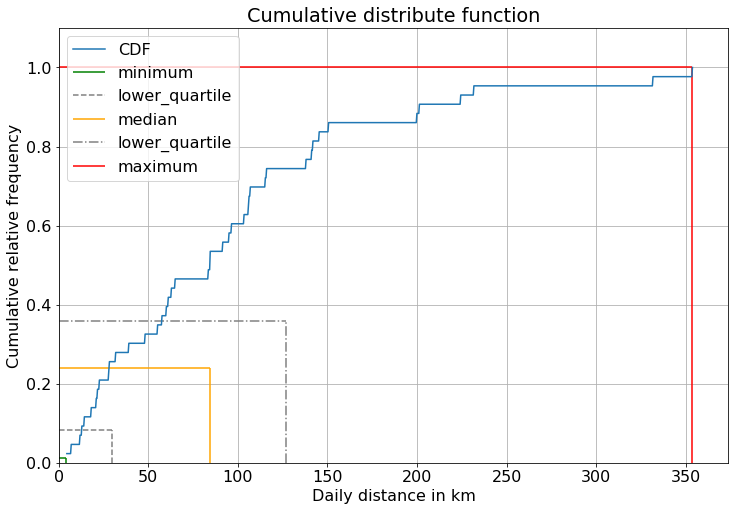

In [202]:
plotCDF(data_df, minimum, lower_quartile, median, upper_quartile, maximum)